In [16]:
!pip install pandas --user
!pip install matplotlib --user
!pip install scikit-learn --user
!pip install tensorflow --user

In [18]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data from the CSV file
dog_data = pd.read_csv("data.csv")  # Use '\t' as the delimiter

print("\nLoaded Data :\n------------------------------------")
print(dog_data.head())

# Converting the strings to numeric inputs
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dog_data['FurColor'] = label_encoder.fit_transform(dog_data['FurColor'])
dog_data['EarShape'] = label_encoder.fit_transform(dog_data['EarShape'])
dog_data['Breed'] = label_encoder.fit_transform(dog_data['Breed'])

np_dog = dog_data.to_numpy()

x_data = np_dog[:, 0:4]
y_data = np_dog[:, 4]

print("\nFeatures before scaling :\n------------------------------------")
print(x_data[:, :5])
print("\nTarget before scaling :\n------------------------------------")
print(y_data[:5])

scaler = StandardScaler().fit(x_data)

x_data = scaler.transform(x_data)

y_data = tf.keras.utils.to_categorical(y_data, 3)

print("\nFeatures after scaling :\n------------------------------------")
print(x_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( x_data, y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)



Loaded Data :
------------------------------------
   Weight(kg)  Height(cm) EarShape  FurColor   Breed
0          10          25   floppy     brown  beagle
1          11          26   floppy     white  beagle
2           9          24    erect  tricolor  beagle
3          12          27    erect     brown  beagle
4          14          29   floppy  tricolor  beagle

Features before scaling :
------------------------------------
[[10 25  1  2]
 [11 26  1  6]
 [ 9 24  0  5]
 [12 27  0  2]
 [14 29  1  5]
 [15 25  0  2]
 [16 26  1  6]
 [13 24  0  5]
 [12 27  1  2]
 [11 29  1  5]
 [17 25  0  2]
 [18 26  1  6]
 [12 24  0  5]
 [10 27  1  2]
 [ 9 29  0  5]
 [16 25  1  2]
 [13 26  0  6]
 [11 24  1  5]
 [14 27  0  2]
 [15 29  1  5]
 [18 30  1  1]
 [20 32  0  7]
 [22 34  1  3]
 [19 31  0  1]
 [21 33  1  7]
 [24 30  1  1]
 [25 32  0  7]
 [23 34  1  3]
 [20 31  0  1]
 [22 33  1  7]
 [26 30  1  1]
 [27 32  0  7]
 [21 34  1  3]
 [19 31  0  1]
 [23 33  1  7]
 [28 30  1  1]
 [29 32  0  7]
 [30 34  1 

In [13]:
from tensorflow import keras

NB_CLASSES = 3

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(
    128,input_shape=(4,),
    name='hiddenLayer1',
    activation='relu'
))

model.add(keras.layers.Dense(
    128,input_shape=(4,),
    name='hiddenLayer2',
    activation='relu'
))

model.add(keras.layers.Dense(
    NB_CLASSES,
    name='outputLayer',
    activation='softmax'
))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()
model.save("dog_breed_model")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenLayer1 (Dense)        (None, 128)               640       
                                                                 
 hiddenLayer2 (Dense)        (None, 128)               16512     
                                                                 
 outputLayer (Dense)         (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: dog_breed_model\assets


INFO:tensorflow:Assets written to: dog_breed_model\assets



Training Progress:
---------------------------------
Epoch 1/20
2/2 [==============================] - 1s 171ms/step - loss: 1.0247 - accuracy: 0.6279 - val_loss: 0.8752 - val_accuracy: 0.5455
Epoch 2/20
2/2 [==============================] - 0s 34ms/step - loss: 0.8206 - accuracy: 0.7907 - val_loss: 0.7524 - val_accuracy: 0.6364
Epoch 3/20
2/2 [==============================] - 0s 34ms/step - loss: 0.7063 - accuracy: 0.7907 - val_loss: 0.6676 - val_accuracy: 0.7273
Epoch 4/20
2/2 [==============================] - 0s 34ms/step - loss: 0.6282 - accuracy: 0.7907 - val_loss: 0.6111 - val_accuracy: 0.7273
Epoch 5/20
2/2 [==============================] - 0s 33ms/step - loss: 0.5664 - accuracy: 0.8372 - val_loss: 0.5515 - val_accuracy: 0.8182
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.5183 - accuracy: 0.8140 - val_loss: 0.5325 - val_accuracy: 0.8182
Epoch 7/20
2/2 [==============================] - 0s 34ms/step - loss: 0.4795 - accuracy: 0.8140 - val_loss: 0.

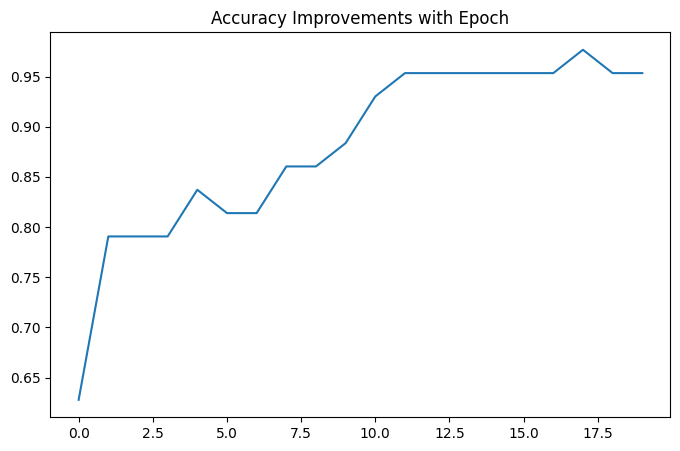


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 27ms/step - loss: 0.1769 - accuracy: 1.0000


[0.17689228057861328, 1.0]

In [14]:
#declaring the verbose
VERBOSE=1

#hyper parameters
Batch_Size=32

Epochs=20

Validation_Split=0.2

print("\nTraining Progress:\n---------------------------------")

history=model.fit(X_train,
                 Y_train,
                 batch_size=Batch_Size,
                 epochs=Epochs,
                 verbose=VERBOSE,
                 validation_split=Validation_Split)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy Improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

In [15]:
prediction_input = [[10, 23, 1, 1]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction*100)

prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 56ms/step
Raw Prediction Output (Probabilities) : [[32.944824   1.7956154 65.25956  ]]
Prediction is  ['poodle']
